In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [55]:
df = pd.read_csv("../data/column_2C_weka_knn.csv")

In [56]:
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,conclusion
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [57]:
df.conclusion = [1 if each == "Abnormal" else 0 for each in df.conclusion]
y = df.conclusion.values
x_data = df.drop(["conclusion"], axis=1)

In [58]:
#normalization 

x = (x_data -np.min(x_data)/np.max(x_data)-np.min(x_data))

In [59]:
# train test split 
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42) 

In [61]:
# knn modeli
from sklearn.neighbors import KNeighborsClassifier 

In [62]:
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors = 18) # n_neighbours = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
prediction

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [63]:
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.8155339805825242 


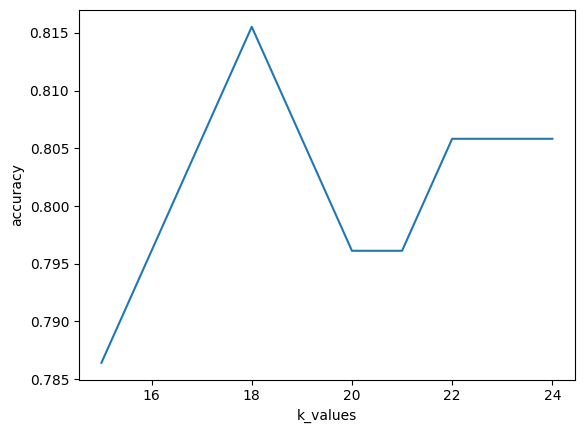

In [64]:
score_list = []

for each in range (15,25):
    
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(15,25),score_list)
plt.xlabel("k_values")
plt.ylabel("accuracy")
plt.show()